Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'ggplot2' was built under R version 3.6.3"'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once 

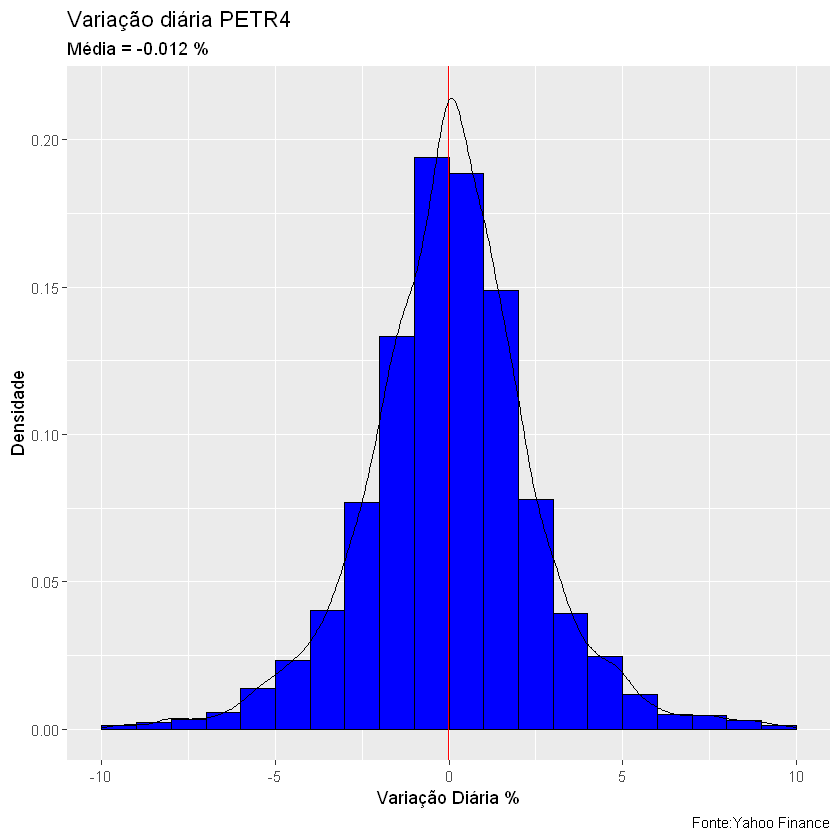

In [1]:
library(quantmod)
library(ggplot2)
petr <- getSymbols("PETR4.SA", src = "yahoo", from = "1998-02-01", to = "2020-06-12",
                   auto.assign = T)
petr <- na.omit(PETR4.SA)
var <- (diff(petr$PETR4.SA.Close,1)/petr$PETR4.SA.Close[2:5027])*100
var <- data.frame(VAR = var)
ggplot(var,aes(`PETR4.SA.Close`, after_stat(density)))+
  geom_histogram(binwidth = 1, fill = "blue",
                 colour = "black", breaks = c(-20:20))+
  labs(x = "Variação Diária %", y = "Densidade", title = "Variação diária PETR4",
        caption = "Fonte:Yahoo Finance",
       subtitle = paste("Média =",round(mean(var$PETR4.SA.Close),3),"%"))+
  geom_vline(xintercept = mean(var$PETR4.SA.Close), colour = "red")+
  geom_density()+
  xlim(c(-10,10))

In [3]:
sd <- sd(var$PETR4.SA.Close)
print(sd)

[1] 2.77342
